In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [2]:
df = pd.read_csv('chatgpt_style_reviews_dataset.xlsx - Sheet1.csv')

def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'[^a-z\s]', '', text) # Remove special characters/numbers
    return text

In [3]:
def get_sentiment(rating):
    if rating >= 4: return 'Positive'
    elif rating == 3: return 'Neutral'
    else: return 'Negative'

In [4]:
df['cleaned_review'] = df['review'].apply(clean_text)

In [5]:
df['sentiment'] = df['rating'].apply(get_sentiment)

In [6]:
df['date_parsed'] = pd.to_datetime(df['date'], errors='coerce')

/tmp/ipython-input-3336516341.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='rating', data=df, palette='viridis')


Text(0.5, 1.0, 'Distribution of Review Ratings')

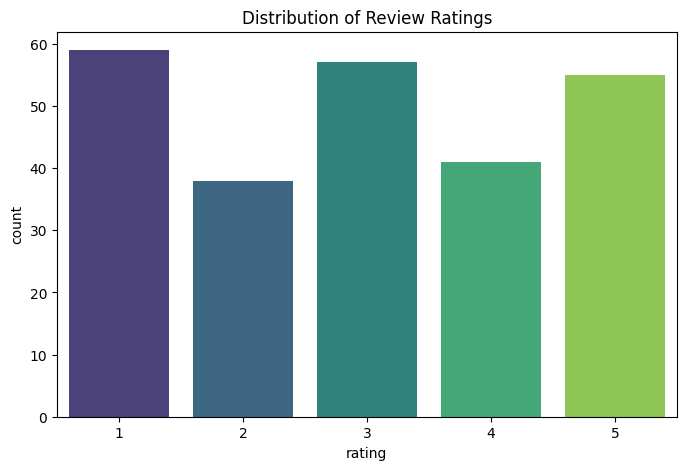

In [7]:
plt.figure(figsize=(8, 5))
sns.countplot(x='rating', data=df, palette='viridis')
plt.title('Distribution of Review Ratings')

In [8]:
def generate_wc(sentiment_type, filename):
    text = " ".join(df[df['sentiment'] == sentiment_type]['cleaned_review'])
    wc = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wc)
    plt.axis('off')
    plt.title(f'{sentiment_type} Reviews Keywords')

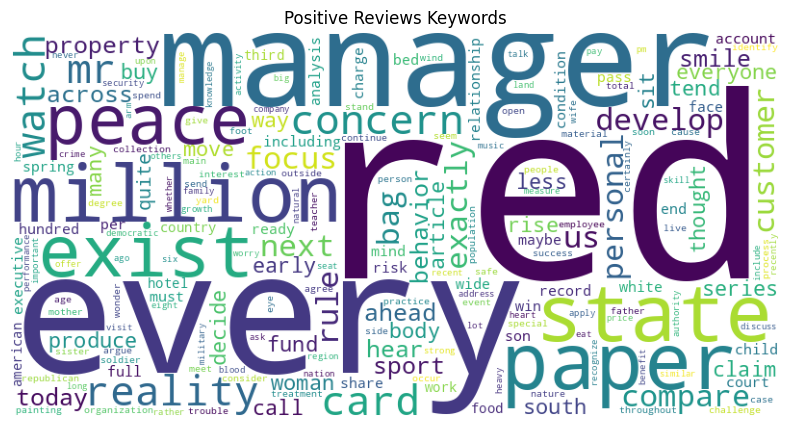

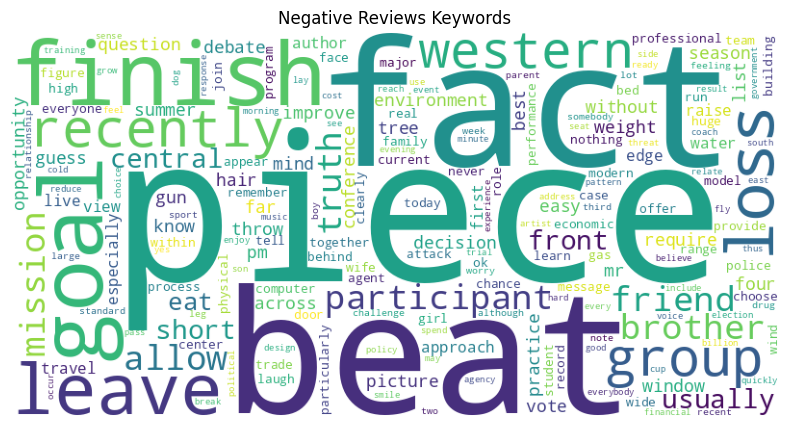

In [9]:
generate_wc('Positive', 'wc_positive.png')
generate_wc('Negative', 'wc_negative.png')

/tmp/ipython-input-911817368.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_time_resampled = df_time.set_index('date_parsed').resample('M')['rating'].mean()


Text(0.5, 1.0, 'Monthly Average Rating Trend')

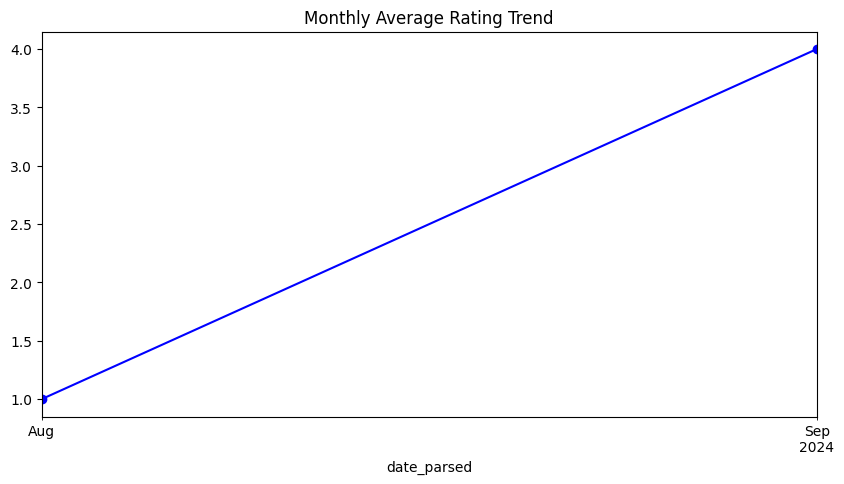

In [10]:
df_time = df.dropna(subset=['date_parsed']).sort_values('date_parsed')
df_time_resampled = df_time.set_index('date_parsed').resample('M')['rating'].mean()
plt.figure(figsize=(10, 5))
df_time_resampled.plot(kind='line', marker='o', color='blue')
plt.title('Monthly Average Rating Trend')

Text(0.5, 1.0, 'Review Length vs Sentiment')

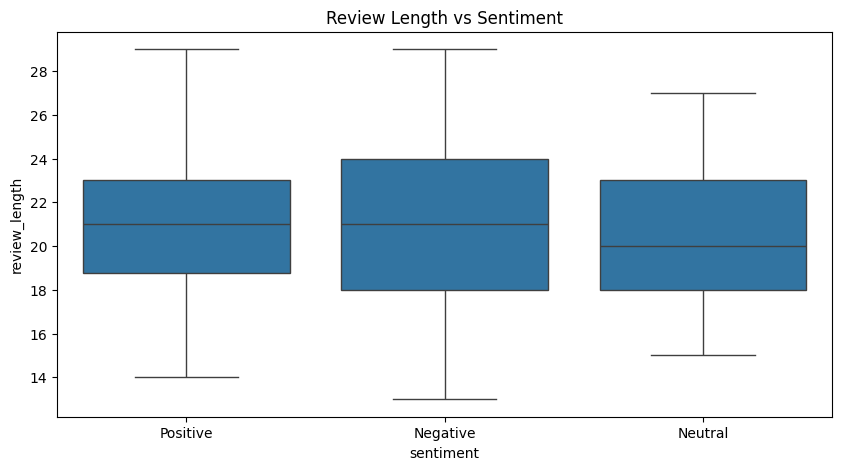

In [11]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='sentiment', y='review_length', data=df)
plt.title('Review Length vs Sentiment')

In [12]:
x = df['cleaned_review']
y = df['sentiment']


In [13]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [14]:
vectorizer = TfidfVectorizer(max_features=2000)
x_train_vec = vectorizer.fit_transform(x_train)
x_test_vec = vectorizer.transform(x_test)

In [15]:
model = LogisticRegression(class_weight='balanced')
model.fit(x_train_vec, y_train)

LogisticRegression(class_weight='balanced')

In [16]:
y_pred = model.predict(x_test_vec)
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred))

Accuracy: 0.38
              precision    recall  f1-score   support

    Negative       0.38      0.40      0.39        20
     Neutral       0.40      0.17      0.24        12
    Positive       0.38      0.50      0.43        18

    accuracy                           0.38        50
   macro avg       0.39      0.36      0.35        50
weighted avg       0.38      0.38      0.37        50

